### Typical Imports, plus some useful functions 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import aperCor

import imp
imp.reload(aperCor)

<module 'aperCor' from '/Users/zjennings/astro/sluggs_phot_calibration/aperCor.py'>

### Run our photometry, using the .sex config file that you've already defined for this observation.

In [2]:
#location of the imaging file directory. modify this for your own purposes
directory = ''

#name of the image file
file = directory+'IUSNO.fits'

#name of the config file
config_file = 'IUSNO.I_aper.seconfig'

#sepcify the apertures used. I recommend about a dozen total apertures, 
apers = np.array([3,6,9,12,15,18,21,24,27,30,33,36,39,42])

###### Sample configuration file. Save this using the config_file name you define above, in the appropriate directory.
Make sure to update catalog_name, parameter file name, and the aperture list as we defined them above. Other values may need to be tweaked on a case-by-case basis, but no easy defined methodology for that yet.

In [3]:
# Default configuration file for SExtractor 2.19.5
# EB 2016-10-05
#
 
#-------------------------------- Catalog ------------------------------------
 
CATALOG_NAME     r_bg1_aper_cor.cat       # name of the output catalog
CATALOG_TYPE     ASCII_HEAD     # NONE,ASCII,ASCII_HEAD, ASCII_SKYCAT,
                                # ASCII_VOTABLE, FITS_1.0 or FITS_LDAC
PARAMETERS_NAME  apertures.param  # name of the file containing catalog contents
 
#------------------------------- Extraction ----------------------------------
 
DETECT_TYPE      CCD            # CCD (linear) or PHOTO (with gamma correction)
DETECT_MINAREA   5              # min. # of pixels above threshold
DETECT_MAXAREA   0              # max. # of pixels above threshold (0=unlimited)
THRESH_TYPE      RELATIVE       # threshold type: RELATIVE (in sigmas)
                                # or ABSOLUTE (in ADUs)
DETECT_THRESH    1.5            # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
ANALYSIS_THRESH  1.5            # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
 
FILTER           Y              # apply filter for detection (Y or N)?
FILTER_NAME      ../default.conv   # name of the file containing the filter
FILTER_THRESH                   # Threshold[s] for retina filtering
 
DEBLEND_NTHRESH  32             # Number of deblending sub-thresholds
DEBLEND_MINCONT  0.005          # Minimum contrast parameter for deblending
 
CLEAN            Y              # Clean spurious detections? (Y or N)?
CLEAN_PARAM      1.0            # Cleaning efficiency
 
MASK_TYPE        CORRECT        # type of detection MASKing: can be one of
                                # NONE, BLANK or CORRECT
 
#-------------------------------- WEIGHTing ----------------------------------

WEIGHT_TYPE      NONE           # type of WEIGHTing: NONE, BACKGROUND,
                                # MAP_RMS, MAP_VAR or MAP_WEIGHT
RESCALE_WEIGHTS  Y              # Rescale input weights/variances (Y/N)?
WEIGHT_IMAGE     weight.fits    # weight-map filename
WEIGHT_GAIN      Y              # modulate gain (E/ADU) with weights? (Y/N)
WEIGHT_THRESH                   # weight threshold[s] for bad pixels

#-------------------------------- FLAGging -----------------------------------

#FLAG_IMAGE       flag.fits      # filename for an input FLAG-image
#FLAG_TYPE        OR             # flag pixel combination: OR, AND, MIN, MAX
                                # or MOST

#------------------------------ Photometry -----------------------------------
 
PHOT_APERTURES   3,6,9,12,15,18,21,24,27,30,33,36,39,42             # MAG_APER aperture diameter(s) in pixels
PHOT_AUTOPARAMS  2.5, 3.5       # MAG_AUTO parameters: <Kron_fact>,<min_radius>
PHOT_PETROPARAMS 2.0, 3.5       # MAG_PETRO parameters: <Petrosian_fact>,
                                # <min_radius>
PHOT_AUTOAPERS   0.0,0.0        # <estimation>,<measurement> minimum apertures
                                # for MAG_AUTO and MAG_PETRO
PHOT_FLUXFRAC    0.5            # flux fraction[s] used for FLUX_RADIUS
 
SATUR_LEVEL      50000.0        # level (in ADUs) at which arises saturation
SATUR_KEY        SATURATE       # keyword for saturation level (in ADUs)
 
MAG_ZEROPOINT    30.0            # magnitude zero-point
MAG_GAMMA        4.0            # gamma of emulsion (for photographic scans)
GAIN             1.62           # detector gain in e-/ADU
GAIN_KEY         GAIN           # keyword for detector gain in e-/ADU
PIXEL_SCALE      0.187            # size of pixel in arcsec (0=use FITS WCS info)
 
#------------------------- Star/Galaxy Separation ----------------------------
 
#SEEING_FWHM      0.8           # stellar FWHM in arcsec
#STARNNW_NAME     default.nnw    # Neural-Network_Weight table filename
 
#------------------------------ Background -----------------------------------
 
BACK_TYPE        AUTO           # AUTO or MANUAL
BACK_VALUE       0.0            # Default background value in MANUAL mode
BACK_SIZE        512             # Background mesh: <size> or <width>,<height>
BACK_FILTERSIZE  9              # Background filter: <size> or <width>,<height>
 
BACKPHOTO_TYPE   GLOBAL         # can be GLOBAL or LOCAL
BACKPHOTO_THICK  24             # thickness of the background LOCAL annulus
BACK_FILTTHRESH  0.0            # Threshold above which the background-
                                # map filter operates
 
#------------------------------ Check Image ----------------------------------
 
CHECKIMAGE_TYPE  NONE           # can be NONE, BACKGROUND, BACKGROUND_RMS,
                                # MINIBACKGROUND, MINIBACK_RMS, -BACKGROUND,
                                # FILTERED, OBJECTS, -OBJECTS, SEGMENTATION,
                                # or APERTURES
CHECKIMAGE_NAME       # Filename for the check-image
 
#--------------------- Memory (change with caution!) -------------------------
 
MEMORY_OBJSTACK  3000           # number of objects in stack
MEMORY_PIXSTACK  300000         # number of pixels in stack
MEMORY_BUFSIZE   1024           # number of lines in buffer
 
#------------------------------- ASSOCiation ---------------------------------

ASSOC_NAME       sky.list       # name of the ASCII file to ASSOCiate
ASSOC_DATA       2,3,4          # columns of the data to replicate (0=all)
ASSOC_PARAMS     2,3,4          # columns of xpos,ypos[,mag]
ASSOCCOORD_TYPE  PIXEL          # ASSOC coordinates: PIXEL or WORLD
ASSOC_RADIUS     2.0            # cross-matching radius (pixels)
ASSOC_TYPE       NEAREST        # ASSOCiation method: FIRST, NEAREST, MEAN,
                                # MAG_MEAN, SUM, MAG_SUM, MIN or MAX
ASSOCSELEC_TYPE  MATCHED        # ASSOC selection type: ALL, MATCHED or -MATCHED

#----------------------------- Miscellaneous ---------------------------------
 
VERBOSE_TYPE     NORMAL         # can be QUIET, NORMAL or FULL
HEADER_SUFFIX    .head          # Filename extension for additional headers
WRITE_XML        N              # Write XML file (Y/N)?
XML_NAME         sex.xml        # Filename for XML output
XSL_URL          file:///usr/local/Cellar/sextractor/2.19.5/share/sextractor/sextractor.xsl
                                # Filename for XSL style-sheet
NTHREADS         1              # 1 single thread

FITS_UNSIGNED    N              # Treat FITS integer values as unsigned (Y/N)?
INTERP_MAXXLAG   16             # Max. lag along X for 0-weight interpolation
INTERP_MAXYLAG   16             # Max. lag along Y for 0-weight interpolation
INTERP_TYPE      ALL            # Interpolation type: NONE, VAR_ONLY or ALL

#--------------------------- Experimental Stuff -----------------------------

PSF_NAME         default.psf    # File containing the PSF model
PSF_NMAX         1              # Max.number of PSFs fitted simultaneously
PATTERN_TYPE     RINGS-HARMONIC # can RINGS-QUADPOLE, RINGS-OCTOPOLE,
                                # RINGS-HARMONICS or GAUSS-LAGUERRE
SOM_NAME         default.som    # File containing Self-Organizing Map weights


SyntaxError: invalid syntax (<ipython-input-3-58e3bbcd6927>, line 7)

###### Sample parameter file. Save this using the parameter file name you defined in the .seconfig file above, same directory as specified above.
Make sure that order follows the pattern below, including the same number of apertures as you choose to specify in the above file.

In [4]:
ALPHA_J2000              Right ascension of barycenter (J2000)                     [deg]
DELTA_J2000              Declination of barycenter (J2000)                         [deg]
MAG_APER(1)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(1)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(2)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(2)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(3)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(3)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(4)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(4)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(5)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(5)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(6)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(6)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(7)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(7)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(8)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(8)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(9)                 #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(9)              #Fixed aperture magnitude vector                           [mag]
MAG_APER(10)                #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(10)             #Fixed aperture magnitude vector                           [mag]
MAG_APER(11)                #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(11)             #Fixed aperture magnitude vector                           [mag]
MAG_APER(12)                #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(12)             #Fixed aperture magnitude vector                           [mag]
MAG_APER(13)                #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(13)             #Fixed aperture magnitude vector                           [mag]
MAG_APER(14)                #Fixed aperture magnitude vector                           [mag]
MAGERR_APER(14)             #Fixed aperture magnitude vector                           [mag]
FWHM_IMAGE               FWHM assuming a gaussian core                             [pixels]
ELLIPTICITY              1 - B_IMAGE/A_IMAGE                                      
FLAGS                    Extraction flags

SyntaxError: invalid syntax (<ipython-input-4-47560b7fcb43>, line 1)

In [7]:
#after everything specified and all config files are saved, can run sextractor using this command
run = os.system("sex -c "+ config_file + ' ' + file)

In [3]:
#read in the data. take this catalog name from what you specified for the above file.
data = np.loadtxt('i_IUSNO_aper_cor.cat')

### Make the merr plot to determine which aperture to use. Could do cuts here, but usually 2x FWHM is easy enough.
Here 6 pix aperture is pretty clear, which corresponds to the 2nd aperture (index = 1).


/Users/zjennings/astro/sluggs_phot_calibration/aperCor.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return data[:,n_apers+2:(2.*n_apers)+2]


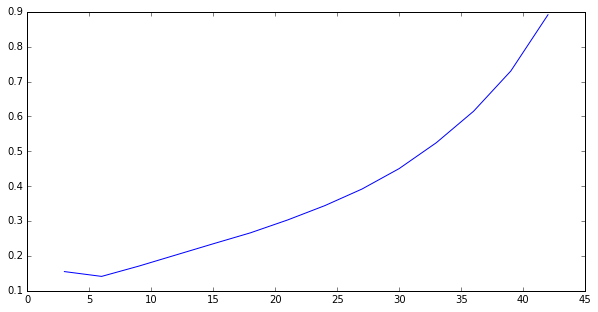

In [4]:
aperCor.make_merr_plot(data,apers)

### Make the COG plot to determine which aperture to correct magnitudes to. 
Just pick the lowest value that the COG seems to flatten out at. Here 21 pix aperture seems pretty reasonable to me (which corresponds to  7th aperture, index=6).

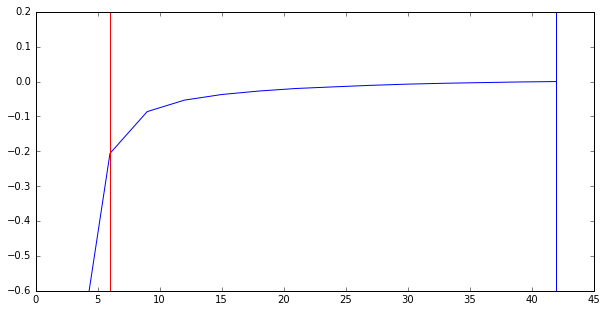

In [17]:
aperCor.make_cog_plot(data[good,:],apers,ylim=(-0.6,0.2),cor_aper=13,meas_aper=1)

### Make the magnitude vs. aperture difference plot to select reasonable locus of stars to choose from.
Iterate on fwhm_max, fwhm_min, saturation and faint cuts to select reasonable sample. 

In [18]:
aper_cor,good = aperCor.calc_aper_cor(data,meas_aper=1,cor_aper=13,fwhm_max=3.2,fwhm_min=2.8,sat_cut=14,faint_cut=17)

/Users/zjennings/astro/sluggs_phot_calibration/aperCor.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  merrs = data[:,n_apers+2:(2.*n_apers)+2]


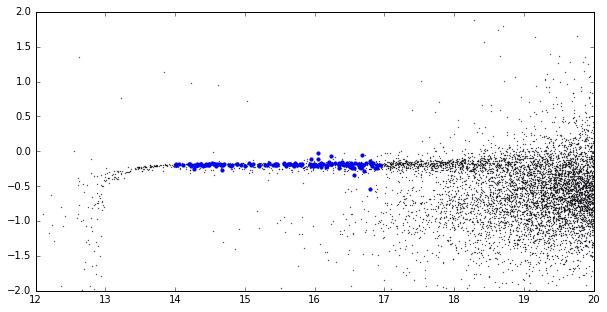

In [19]:
aperCor.make_diff_plot(data,good,meas_aper=1,cor_aper=7,xlim=(12,20))

In [20]:
print(aper_cor)

0.2061


In [21]:
n_aper = apers.shape[0]
meas_aper = 10 #specify the selected measure aperture here
uncorrected_data = np.array([data[:,0],data[:,1],data[:,meas_aper+2],data[:,meas_aper+n_aper+2],data[:,-3],data[:,-2],data[:,-1]]).T
np.savetxt('IUSNO_uncorrected.csv',uncorrected_data,delimiter=' ',fmt='%10.10f')

In [60]:
data.shape

(221937, 33)

In [61]:
apers[5]

18